In [ ]:
###Fatemeh Karimnezhad

In [1]:
import pandas as pd
import numpy as np
#import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import datetime as dt

In [2]:
df1= pd.read_csv('Louisville_Metro_KY_-_Crime_Data_2019.csv')
df2= pd.read_csv('Louisville_Metro_KY_-_Crime_Data_2020.csv')
df3= pd.read_csv('CRIME_DATA_2021.csv')
df4= pd.read_csv('Louisville_Metro_KY_-_Crime_Data_2022.csv')

C:\Users\AmirSaqar\AppData\Local\Temp\ipykernel_2856\807466174.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.read_csv('Louisville_Metro_KY_-_Crime_Data_2020.csv')


In [3]:
df=pd.concat([df1,df2,df3,df4] ,axis=0 )
df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,ObjectId
0,80-19-000313,2019/01/02 09:04:00,2019/01/02 09:04:00,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,4900 BLOCK AXTELL AVE ...,LOUISVILLE,40258,1.0
1,80-19-000314,2019/01/02 10:29:00,2018/12/31 09:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,26C,PART II,COMPLETED,3RD DIVISION,323,OTHER / UNKNOWN,600 BLOCK KIRSCH WAY ...,LOUISVILLE,40118,2.0
2,80-19-000315,2019/01/02 10:23:00,2018/12/31 14:30:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,1000 BLOCK S PRESTON ST ...,LOUISVILLE,40203,3.0
3,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,13B,PART II,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,4.0
4,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57151,80-22-061359,2022/10/21 14:01:00,2022/10/20 21:00:00,ASSAULT,TERRORISTIC THREATENING 3RD DEGREE,13C,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5300 BLOCK TWINKLE DR ...,LOUISVILLE,40258,57152.0
57152,80-22-061360,2022/10/21 13:41:00,2022/10/21 13:35:00,ASSAULT,VIOLATION OF KENTUCKY EPO/DVO,90F,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,700 BLOCK GHEENS AVE ...,LOUISVILLE,40214,57153.0
57153,80-22-061361,2022/10/21 14:15:00,2022/09/28 12:37:00,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,8TH DIVISION,812,OTHER RESIDENCE (APARTMENT/CONDO),2900 BLOCK BIRD CHERRY LN ...,LOUISVILLE,40241,57154.0
57154,80-22-061362,2022/10/21 14:18:00,2022/10/02 00:00:00,OTHER,HARASSING COMMUNICATIONS,90Z,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,9200 BLOCK WANLOU DR ...,LOUISVILLE,40272,57155.0


In [4]:
z=[]
for i in range (len(df['City'])) :
    z.append(i)
z=pd.Series(z)
df.index= z
df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,ObjectId
0,80-19-000313,2019/01/02 09:04:00,2019/01/02 09:04:00,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,4900 BLOCK AXTELL AVE ...,LOUISVILLE,40258,1.0
1,80-19-000314,2019/01/02 10:29:00,2018/12/31 09:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,26C,PART II,COMPLETED,3RD DIVISION,323,OTHER / UNKNOWN,600 BLOCK KIRSCH WAY ...,LOUISVILLE,40118,2.0
2,80-19-000315,2019/01/02 10:23:00,2018/12/31 14:30:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,1000 BLOCK S PRESTON ST ...,LOUISVILLE,40203,3.0
3,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,13B,PART II,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,4.0
4,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272891,80-22-061359,2022/10/21 14:01:00,2022/10/20 21:00:00,ASSAULT,TERRORISTIC THREATENING 3RD DEGREE,13C,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5300 BLOCK TWINKLE DR ...,LOUISVILLE,40258,57152.0
272892,80-22-061360,2022/10/21 13:41:00,2022/10/21 13:35:00,ASSAULT,VIOLATION OF KENTUCKY EPO/DVO,90F,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,700 BLOCK GHEENS AVE ...,LOUISVILLE,40214,57153.0
272893,80-22-061361,2022/10/21 14:15:00,2022/09/28 12:37:00,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,8TH DIVISION,812,OTHER RESIDENCE (APARTMENT/CONDO),2900 BLOCK BIRD CHERRY LN ...,LOUISVILLE,40241,57154.0
272894,80-22-061362,2022/10/21 14:18:00,2022/10/02 00:00:00,OTHER,HARASSING COMMUNICATIONS,90Z,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,9200 BLOCK WANLOU DR ...,LOUISVILLE,40272,57155.0


In [5]:
df.isnull().sum()

INCIDENT_NUMBER        0
DATE_REPORTED          0
DATE_OCCURED           0
CRIME_TYPE             0
UOR_DESC               0
NIBRS_CODE             0
UCR_HIERARCHY       7124
ATT_COMP             362
LMPD_DIVISION          0
LMPD_BEAT             87
PREMISE_TYPE          53
BLOCK_ADDRESS          0
City                  49
ZIP_CODE             323
ObjectId           72095
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272896 entries, 0 to 272895
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   INCIDENT_NUMBER  272896 non-null  object 
 1   DATE_REPORTED    272896 non-null  object 
 2   DATE_OCCURED     272896 non-null  object 
 3   CRIME_TYPE       272896 non-null  object 
 4   UOR_DESC         272896 non-null  object 
 5   NIBRS_CODE       272896 non-null  object 
 6   UCR_HIERARCHY    265772 non-null  object 
 7   ATT_COMP         272534 non-null  object 
 8   LMPD_DIVISION    272896 non-null  object 
 9   LMPD_BEAT        272809 non-null  object 
 10  PREMISE_TYPE     272843 non-null  object 
 11  BLOCK_ADDRESS    272896 non-null  object 
 12  City             272847 non-null  object 
 13  ZIP_CODE         272573 non-null  object 
 14  ObjectId         200801 non-null  float64
dtypes: float64(1), object(14)
memory usage: 18.7+ MB


In [7]:
###########filling null values

df=df.drop(['ObjectId'],axis=1)

values={'ATT_COMP': 'unknown','UCR_HIERARCHY': 'unknown'}
df=df.fillna(value=values)

df.isnull().sum()

INCIDENT_NUMBER      0
DATE_REPORTED        0
DATE_OCCURED         0
CRIME_TYPE           0
UOR_DESC             0
NIBRS_CODE           0
UCR_HIERARCHY        0
ATT_COMP             0
LMPD_DIVISION        0
LMPD_BEAT           87
PREMISE_TYPE        53
BLOCK_ADDRESS        0
City                49
ZIP_CODE           323
dtype: int64

In [8]:
df=df.dropna()

df.isnull().sum()

INCIDENT_NUMBER    0
DATE_REPORTED      0
DATE_OCCURED       0
CRIME_TYPE         0
UOR_DESC           0
NIBRS_CODE         0
UCR_HIERARCHY      0
ATT_COMP           0
LMPD_DIVISION      0
LMPD_BEAT          0
PREMISE_TYPE       0
BLOCK_ADDRESS      0
City               0
ZIP_CODE           0
dtype: int64

In [9]:
df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE
0,80-19-000313,2019/01/02 09:04:00,2019/01/02 09:04:00,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,4900 BLOCK AXTELL AVE ...,LOUISVILLE,40258
1,80-19-000314,2019/01/02 10:29:00,2018/12/31 09:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,26C,PART II,COMPLETED,3RD DIVISION,323,OTHER / UNKNOWN,600 BLOCK KIRSCH WAY ...,LOUISVILLE,40118
2,80-19-000315,2019/01/02 10:23:00,2018/12/31 14:30:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,1000 BLOCK S PRESTON ST ...,LOUISVILLE,40203
3,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,13B,PART II,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210
4,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272891,80-22-061359,2022/10/21 14:01:00,2022/10/20 21:00:00,ASSAULT,TERRORISTIC THREATENING 3RD DEGREE,13C,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5300 BLOCK TWINKLE DR ...,LOUISVILLE,40258
272892,80-22-061360,2022/10/21 13:41:00,2022/10/21 13:35:00,ASSAULT,VIOLATION OF KENTUCKY EPO/DVO,90F,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,700 BLOCK GHEENS AVE ...,LOUISVILLE,40214
272893,80-22-061361,2022/10/21 14:15:00,2022/09/28 12:37:00,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,8TH DIVISION,812,OTHER RESIDENCE (APARTMENT/CONDO),2900 BLOCK BIRD CHERRY LN ...,LOUISVILLE,40241
272894,80-22-061362,2022/10/21 14:18:00,2022/10/02 00:00:00,OTHER,HARASSING COMMUNICATIONS,90Z,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,9200 BLOCK WANLOU DR ...,LOUISVILLE,40272


In [10]:
#df=df[df.duplicated(subset=['INCIDENT_NUMBER'])]
#df.info()

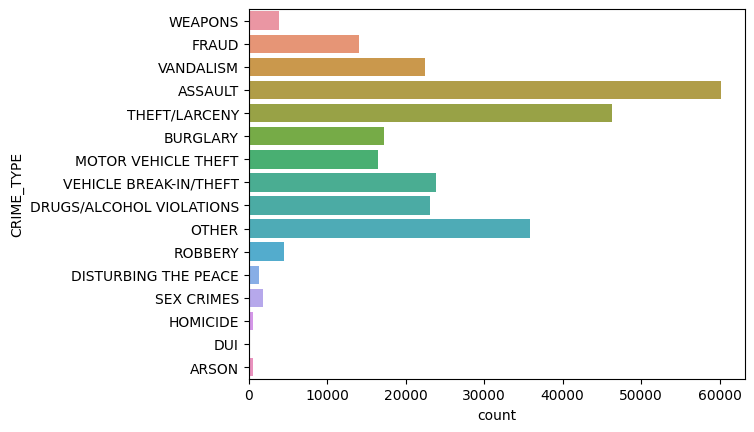

In [11]:

ax = sns.countplot(y=df["CRIME_TYPE"])

In [12]:

f=pd.crosstab(df['CRIME_TYPE'],df['ZIP_CODE'])
f

ZIP_CODE,0,19132.0,20203.0,30113.0,40023,40025,40041.0,40043,40056.0,40059,...,40245,40258,4027,40272,40291,40299,41021,4291,DRIVE,`
CRIME_TYPE,,,,,,,,,,,,,,,,,,,,,
ARSON,0,0,0,0,0,0,0,0,0,4,...,2,4,0,1,1,1,0,0,0,0
ASSAULT,30,0,0,0,19,1,0,0,20,82,...,254,930,0,1305,552,228,0,1,0,0
BURGLARY,0,0,0,0,4,2,0,0,0,32,...,110,271,1,400,195,98,1,0,0,1
DISTURBING THE PEACE,3,0,0,0,3,0,0,0,2,4,...,9,21,0,25,11,3,0,0,0,0
DRUGS/ALCOHOL VIOLATIONS,11,0,0,0,0,0,0,0,0,8,...,40,207,0,507,160,36,0,0,0,0
DUI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FRAUD,5,0,0,0,26,0,0,0,136,57,...,135,240,0,285,196,122,0,0,0,0
HOMICIDE,0,0,0,0,1,0,0,0,1,0,...,2,5,0,5,1,2,0,0,0,0
MOTOR VEHICLE THEFT,1,0,0,0,5,0,0,0,1,20,...,105,259,0,365,227,107,0,0,1,0


In [13]:
f.sum(axis=1)

CRIME_TYPE
ARSON                         515
ASSAULT                     60168
BURGLARY                    17267
DISTURBING THE PEACE         1355
DRUGS/ALCOHOL VIOLATIONS    23131
DUI                             7
FRAUD                       14078
HOMICIDE                      591
MOTOR VEHICLE THEFT         16531
OTHER                       35788
ROBBERY                      4502
SEX CRIMES                   1904
THEFT/LARCENY               46271
VANDALISM                   22538
VEHICLE BREAK-IN/THEFT      23911
WEAPONS                      3874
dtype: int64

<AxesSubplot: xlabel='ZIP_CODE'>

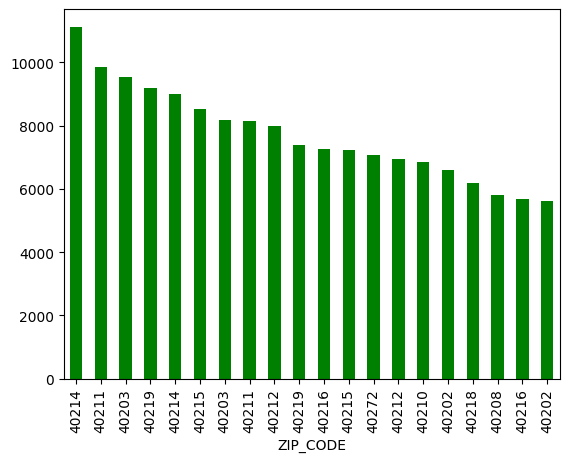

In [14]:

f.sum(axis=0).sort_values(ascending=False)[:20].plot.bar(color='g')

In [15]:
df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE
0,80-19-000313,2019/01/02 09:04:00,2019/01/02 09:04:00,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,4900 BLOCK AXTELL AVE ...,LOUISVILLE,40258
1,80-19-000314,2019/01/02 10:29:00,2018/12/31 09:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,26C,PART II,COMPLETED,3RD DIVISION,323,OTHER / UNKNOWN,600 BLOCK KIRSCH WAY ...,LOUISVILLE,40118
2,80-19-000315,2019/01/02 10:23:00,2018/12/31 14:30:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,1000 BLOCK S PRESTON ST ...,LOUISVILLE,40203
3,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,13B,PART II,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210
4,80-19-000316,2019/01/02 10:15:00,2019/01/02 10:11:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272891,80-22-061359,2022/10/21 14:01:00,2022/10/20 21:00:00,ASSAULT,TERRORISTIC THREATENING 3RD DEGREE,13C,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5300 BLOCK TWINKLE DR ...,LOUISVILLE,40258
272892,80-22-061360,2022/10/21 13:41:00,2022/10/21 13:35:00,ASSAULT,VIOLATION OF KENTUCKY EPO/DVO,90F,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,700 BLOCK GHEENS AVE ...,LOUISVILLE,40214
272893,80-22-061361,2022/10/21 14:15:00,2022/09/28 12:37:00,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,8TH DIVISION,812,OTHER RESIDENCE (APARTMENT/CONDO),2900 BLOCK BIRD CHERRY LN ...,LOUISVILLE,40241
272894,80-22-061362,2022/10/21 14:18:00,2022/10/02 00:00:00,OTHER,HARASSING COMMUNICATIONS,90Z,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,9200 BLOCK WANLOU DR ...,LOUISVILLE,40272


In [17]:
df['DATE_OCCURED'] = pd.to_datetime(df['DATE_OCCURED'])

In [18]:
df['DATE_REPORTED'] = pd.to_datetime(df['DATE_REPORTED'])

In [19]:
df['month'] = df['DATE_REPORTED'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [20]:
df['month'] = df['month'].str[0:7]

In [21]:
df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,month
0,80-19-000313,2019-01-02 09:04:00,2019-01-02 09:04:00,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,4900 BLOCK AXTELL AVE ...,LOUISVILLE,40258,2019-01
1,80-19-000314,2019-01-02 10:29:00,2018-12-31 09:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,26C,PART II,COMPLETED,3RD DIVISION,323,OTHER / UNKNOWN,600 BLOCK KIRSCH WAY ...,LOUISVILLE,40118,2019-01
2,80-19-000315,2019-01-02 10:23:00,2018-12-31 14:30:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,1000 BLOCK S PRESTON ST ...,LOUISVILLE,40203,2019-01
3,80-19-000316,2019-01-02 10:15:00,2019-01-02 10:11:00,ASSAULT,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,13B,PART II,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,2019-01
4,80-19-000316,2019-01-02 10:15:00,2019-01-02 10:11:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272891,80-22-061359,2022-10-21 14:01:00,2022-10-20 21:00:00,ASSAULT,TERRORISTIC THREATENING 3RD DEGREE,13C,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5300 BLOCK TWINKLE DR ...,LOUISVILLE,40258,2022-10
272892,80-22-061360,2022-10-21 13:41:00,2022-10-21 13:35:00,ASSAULT,VIOLATION OF KENTUCKY EPO/DVO,90F,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,700 BLOCK GHEENS AVE ...,LOUISVILLE,40214,2022-10
272893,80-22-061361,2022-10-21 14:15:00,2022-09-28 12:37:00,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,8TH DIVISION,812,OTHER RESIDENCE (APARTMENT/CONDO),2900 BLOCK BIRD CHERRY LN ...,LOUISVILLE,40241,2022-10
272894,80-22-061362,2022-10-21 14:18:00,2022-10-02 00:00:00,OTHER,HARASSING COMMUNICATIONS,90Z,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,9200 BLOCK WANLOU DR ...,LOUISVILLE,40272,2022-10


In [22]:
t= pd.crosstab(df['month'],df['CRIME_TYPE'])

In [23]:
t

CRIME_TYPE,ARSON,ASSAULT,BURGLARY,DISTURBING THE PEACE,DRUGS/ALCOHOL VIOLATIONS,DUI,FRAUD,HOMICIDE,MOTOR VEHICLE THEFT,OTHER,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,WEAPONS
month,,,,,,,,,,,,,,,,
2019-01,0,1052,373,39,1295,0,389,4,354,618,89,33,1140,450,461,183
2019-02,2,1008,329,39,1025,2,316,6,312,573,64,33,1069,385,411,123
2019-03,5,1154,321,23,985,0,358,4,307,651,66,38,1115,441,509,125
2019-04,2,1110,346,33,997,1,316,10,309,653,72,36,1127,456,518,125
2019-05,4,1348,483,38,614,1,309,15,328,718,113,44,1380,514,544,104
2019-06,13,1241,393,38,528,0,316,14,416,708,97,61,1310,508,655,83
2019-07,16,1261,420,33,701,0,358,9,362,679,78,71,1355,536,619,92
2019-08,10,1238,430,33,676,0,352,5,340,668,99,50,1201,497,593,103
2019-09,0,1277,330,32,632,0,320,9,317,698,114,44,1211,401,535,84


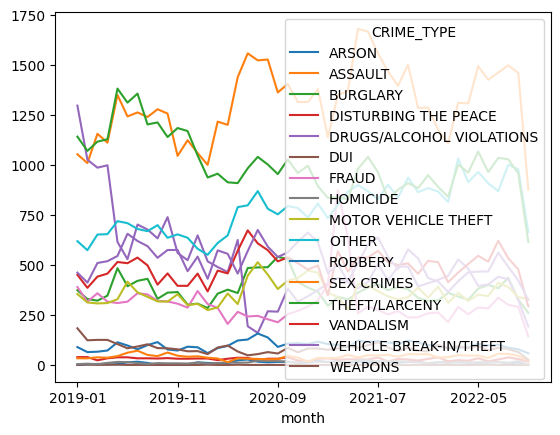

In [24]:
t.plot()
plt.show()

In [26]:
df['take-to-reported'] = df['DATE_REPORTED'] - df['DATE_OCCURED']

In [27]:
df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,month,take-to-reported
0,80-19-000313,2019-01-02 09:04:00,2019-01-02 09:04:00,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,4900 BLOCK AXTELL AVE ...,LOUISVILLE,40258,2019-01,0 days 00:00:00
1,80-19-000314,2019-01-02 10:29:00,2018-12-31 09:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,26C,PART II,COMPLETED,3RD DIVISION,323,OTHER / UNKNOWN,600 BLOCK KIRSCH WAY ...,LOUISVILLE,40118,2019-01,2 days 01:29:00
2,80-19-000315,2019-01-02 10:23:00,2018-12-31 14:30:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,1000 BLOCK S PRESTON ST ...,LOUISVILLE,40203,2019-01,1 days 19:53:00
3,80-19-000316,2019-01-02 10:15:00,2019-01-02 10:11:00,ASSAULT,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,13B,PART II,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,2019-01,0 days 00:04:00
4,80-19-000316,2019-01-02 10:15:00,2019-01-02 10:11:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,2019-01,0 days 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272891,80-22-061359,2022-10-21 14:01:00,2022-10-20 21:00:00,ASSAULT,TERRORISTIC THREATENING 3RD DEGREE,13C,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5300 BLOCK TWINKLE DR ...,LOUISVILLE,40258,2022-10,0 days 17:01:00
272892,80-22-061360,2022-10-21 13:41:00,2022-10-21 13:35:00,ASSAULT,VIOLATION OF KENTUCKY EPO/DVO,90F,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,700 BLOCK GHEENS AVE ...,LOUISVILLE,40214,2022-10,0 days 00:06:00
272893,80-22-061361,2022-10-21 14:15:00,2022-09-28 12:37:00,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,8TH DIVISION,812,OTHER RESIDENCE (APARTMENT/CONDO),2900 BLOCK BIRD CHERRY LN ...,LOUISVILLE,40241,2022-10,23 days 01:38:00
272894,80-22-061362,2022-10-21 14:18:00,2022-10-02 00:00:00,OTHER,HARASSING COMMUNICATIONS,90Z,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,9200 BLOCK WANLOU DR ...,LOUISVILLE,40272,2022-10,19 days 14:18:00


In [28]:
taketoreport = df['take-to-reported'].sort_values(ascending=False)[:5000]
taketoreport

C:\Users\AmirSaqar\AppData\Local\Temp\ipykernel_2856\1817499630.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  taketoreport = df['take-to-reported'].sort_values(ascending=False)[:5000]


7472     43500 days 01:07:00
221331   36531 days 14:40:00
57476    32331 days 10:25:00
62237    22056 days 05:09:00
215090   21547 days 08:45:00
                 ...        
166417     104 days 10:11:00
196028     104 days 09:30:00
41149      104 days 05:52:00
70024      104 days 05:48:00
176027     104 days 05:48:00
Name: take-to-reported, Length: 5000, dtype: timedelta64[ns]

In [29]:
theindex=taketoreport.index
theindex

Int64Index([  7472, 221331,  57476,  62237, 215090,  79714, 202951,  15414,
              5598,  64562,
            ...
             33919, 237825, 237826,  33792, 118670, 166417, 196028,  41149,
             70024, 176027],
           dtype='int64', length=5000)

In [30]:
s=[]
for i in theindex:
    s.append(df['CRIME_TYPE'][i])
    
s

['ASSAULT',
 'THEFT/LARCENY',
 'OTHER',
 'SEX CRIMES',
 'OTHER',
 'FRAUD',
 'BURGLARY',
 'SEX CRIMES',
 'SEX CRIMES',
 'OTHER',
 'SEX CRIMES',
 'SEX CRIMES',
 'OTHER',
 'SEX CRIMES',
 'SEX CRIMES',
 'SEX CRIMES',
 'SEX CRIMES',
 'SEX CRIMES',
 'SEX CRIMES',
 'SEX CRIMES',
 'SEX CRIMES',
 'BURGLARY',
 'SEX CRIMES',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'SEX CRIMES',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'OTHER',
 'OTHER',
 'THEFT/LARCENY',
 'FRAUD',
 'FRAUD',
 'FRAUD',
 'ASSAULT',
 'ASSAULT',
 'FRAUD',
 'OTHER',
 'FRAUD',
 'OTHER',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'FRAUD',
 'FRAUD',
 'SEX CRIMES',
 'ASSAULT',
 'ASSAULT',
 'SEX CRIMES',
 'FRAUD',
 'FRAUD',
 'VEHICLE BREAK-IN/THEFT',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'FRAUD',
 'THEFT/LARCENY',
 'FRAUD',
 'FRAUD',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'FRAUD',
 'FRAUD',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'THEFT/LARCENY',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',
 'FRAUD',
 'SEX CRIMES',


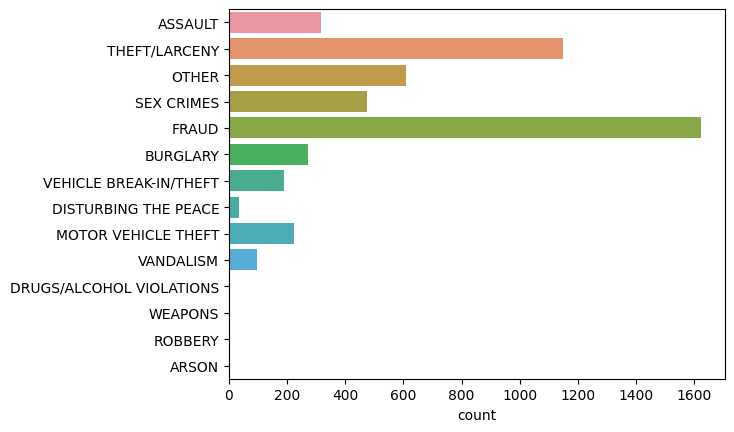

In [31]:
ax = sns.countplot(y= s )

In [33]:
df['month2'] = df['month'].str[5:7]

In [34]:
t2= pd.crosstab(df['month2'],df['CRIME_TYPE'])
t2

CRIME_TYPE,ARSON,ASSAULT,BURGLARY,DISTURBING THE PEACE,DRUGS/ALCOHOL VIOLATIONS,DUI,FRAUD,HOMICIDE,MOTOR VEHICLE THEFT,OTHER,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,WEAPONS
month2,,,,,,,,,,,,,,,,
01,46,4661,1368,140,2740,0,1343,46,1511,2870,389,148,3968,1916,2032,433
02,40,4251,1268,122,2394,3,1235,37,1256,2669,310,142,3679,1513,1663,337
03,46,5025,1359,97,2435,0,1806,45,1293,3092,336,154,3908,1941,2000,388
04,32,4985,1374,113,2355,1,1408,46,1261,3079,344,147,3827,1883,1951,401
05,55,5955,1584,135,2016,2,1119,62,1387,3368,463,162,4332,2166,1974,352
06,65,5886,1663,118,1537,1,1131,64,1602,3279,435,175,4294,2232,2292,301
07,64,5798,1693,120,1804,0,1214,60,1653,3242,455,204,4390,2333,2490,345
08,47,5724,1726,119,1795,0,1132,55,1522,3348,434,183,4057,2117,2213,333
09,38,5490,1585,122,1712,0,1092,66,1363,3262,387,159,3995,1894,1974,274


<AxesSubplot: xlabel='month2'>

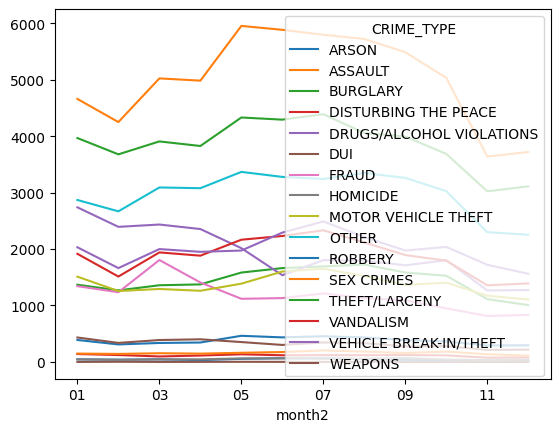

In [35]:
t2.plot()

<AxesSubplot: xlabel='month2'>

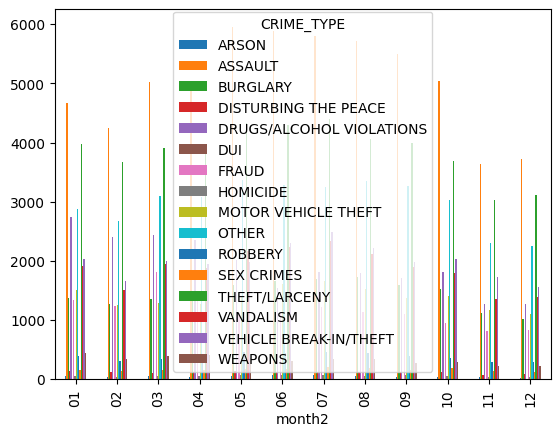

In [36]:
t2.plot.bar()

In [38]:
t3= pd.crosstab(df['LMPD_DIVISION'],df['CRIME_TYPE'])
t3

CRIME_TYPE,ARSON,ASSAULT,BURGLARY,DISTURBING THE PEACE,DRUGS/ALCOHOL VIOLATIONS,DUI,FRAUD,HOMICIDE,MOTOR VEHICLE THEFT,OTHER,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,WEAPONS
LMPD_DIVISION,,,,,,,,,,,,,,,,
1ST DIVISION,90,8853,2140,200,4123,3,1357,104,1828,5000,790,227,5272,3470,2485,778
2ND DIVISION,106,10865,2137,172,3999,0,1099,157,2035,5699,641,208,3805,3613,1399,1025
3RD DIVISION,51,10271,3193,220,3185,0,2469,60,3013,4929,636,290,9118,3383,3428,453
4TH DIVISION,123,11936,3622,259,5209,1,1817,121,3234,6398,1047,304,7155,4500,4212,832
5TH DIVISION,22,2638,1095,84,1357,0,1140,21,1004,1974,179,105,3081,1389,2427,129
6TH DIVISION,47,7168,2182,188,1997,2,1860,68,2205,4949,620,227,5797,2688,3378,291
7TH DIVISION,32,5276,1921,142,2206,1,2087,35,2084,3921,400,214,7014,2214,3367,217
8TH DIVISION,28,2883,965,80,607,0,1938,18,1081,2494,170,136,4811,1233,3167,70
METRO LOUISVILLE,16,278,12,10,448,0,311,7,47,424,19,193,218,48,48,79


<AxesSubplot: ylabel='LMPD_DIVISION'>

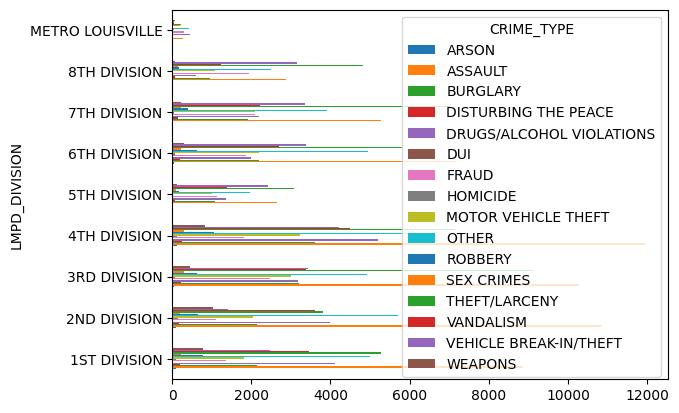

In [39]:
t3.plot.barh()

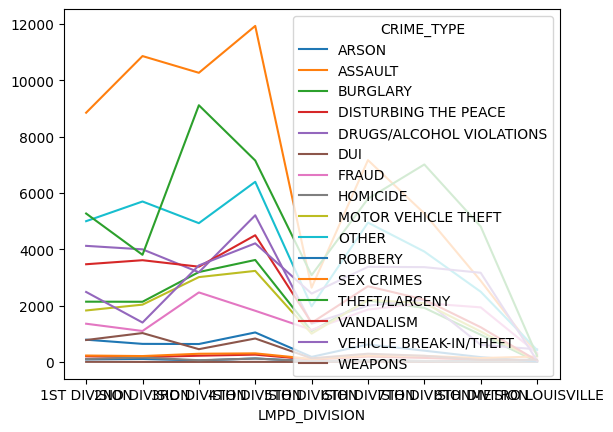

In [40]:
t3.plot()
plt.show()

In [123]:
a=pd.crosstab(df['UOR_DESC'],df['CRIME_TYPE'], margins=False)
b=pd.crosstab(df['LMPD_DIVISION'],df['CRIME_TYPE'], margins=False)
c=pd.crosstab(df['PREMISE_TYPE'],df['CRIME_TYPE'], margins=False)
d=pd.crosstab(df['ZIP_CODE'],df['CRIME_TYPE'], margins=False)

In [124]:
L=[a,b,c,d]
for i in L:
    c, p, dof, expected = stats.chi2_contingency(a)
    if p >= 0.05:
        print('independant')
    else:
        print('dependant')

dependant
dependant
dependant
dependant


In [106]:
lmpd_premise= pd.crosstab(df['PREMISE_TYPE'],df['LMPD_DIVISION'], margins=False)
lmpd_premise

LMPD_DIVISION,1ST DIVISION,2ND DIVISION,3RD DIVISION,4TH DIVISION,5TH DIVISION,6TH DIVISION,7TH DIVISION,8TH DIVISION,METRO LOUISVILLE
PREMISE_TYPE,,,,,,,,,
ABANDONED/CONDEMNED STRUCTURE,39,24,12,17,6,2,5,0,3
AIR / BUS / TRAIN TERMINAL,172,19,7,29,9,83,16,6,2
AMUSEMENT PARK,4,1,3,58,2,11,0,1,1
ATM SEPARATE FROM BANK,28,19,19,25,3,10,15,15,4
ATTACHED RESIDENTIAL GARAGE,8,11,47,25,38,30,57,59,0
AUTO DEALERSHIP (NEW OR USED),38,32,283,138,21,383,173,62,11
BANK / SAVINGS & LOAN,195,68,241,148,109,233,201,134,21
BAR / NIGHT CLUB,334,54,73,205,392,144,78,57,57
CAMP / CAMPGROUND,31,0,3,12,1,15,1,1,1


<AxesSubplot: ylabel='PREMISE_TYPE'>

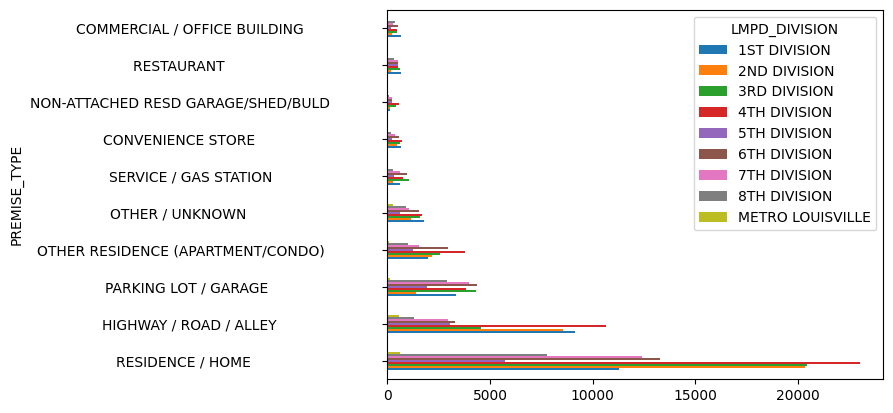

In [116]:
lmpd_premise.sort_values(by='4TH DIVISION',ascending=False)[:10].plot.barh()

In [115]:
df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,month,take-to-reported,month2
0,80-19-000313,2019-01-02 09:04:00,2019-01-02 09:04:00,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,4900 BLOCK AXTELL AVE ...,LOUISVILLE,40258,2019-01,0 days 00:00:00,01
1,80-19-000314,2019-01-02 10:29:00,2018-12-31 09:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,26C,PART II,COMPLETED,3RD DIVISION,323,OTHER / UNKNOWN,600 BLOCK KIRSCH WAY ...,LOUISVILLE,40118,2019-01,2 days 01:29:00,01
2,80-19-000315,2019-01-02 10:23:00,2018-12-31 14:30:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,1000 BLOCK S PRESTON ST ...,LOUISVILLE,40203,2019-01,1 days 19:53:00,01
3,80-19-000316,2019-01-02 10:15:00,2019-01-02 10:11:00,ASSAULT,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) MINOR...,13B,PART II,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,2019-01,0 days 00:04:00,01
4,80-19-000316,2019-01-02 10:15:00,2019-01-02 10:11:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,2ND DIVISION,225,RESIDENCE / HOME,1600 BLOCK BRASHEAR DR ...,LOUISVILLE,40210,2019-01,0 days 00:04:00,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272891,80-22-061359,2022-10-21 14:01:00,2022-10-20 21:00:00,ASSAULT,TERRORISTIC THREATENING 3RD DEGREE,13C,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,5300 BLOCK TWINKLE DR ...,LOUISVILLE,40258,2022-10,0 days 17:01:00,10
272892,80-22-061360,2022-10-21 13:41:00,2022-10-21 13:35:00,ASSAULT,VIOLATION OF KENTUCKY EPO/DVO,90F,PART II,COMPLETED,3RD DIVISION,322,RESIDENCE / HOME,700 BLOCK GHEENS AVE ...,LOUISVILLE,40214,2022-10,0 days 00:06:00,10
272893,80-22-061361,2022-10-21 14:15:00,2022-09-28 12:37:00,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,8TH DIVISION,812,OTHER RESIDENCE (APARTMENT/CONDO),2900 BLOCK BIRD CHERRY LN ...,LOUISVILLE,40241,2022-10,23 days 01:38:00,10
272894,80-22-061362,2022-10-21 14:18:00,2022-10-02 00:00:00,OTHER,HARASSING COMMUNICATIONS,90Z,PART II,COMPLETED,3RD DIVISION,334,RESIDENCE / HOME,9200 BLOCK WANLOU DR ...,LOUISVILLE,40272,2022-10,19 days 14:18:00,10


In [107]:
x= lmpd_premise.sum(axis=1).sort_values(ascending=False)[:10]
x

PREMISE_TYPE
RESIDENCE / HOME                                 114972
HIGHWAY / ROAD / ALLEY                            44034
PARKING LOT / GARAGE                              26182
OTHER RESIDENCE (APARTMENT/CONDO)                 17255
OTHER / UNKNOWN                                   10590
DEPARTMENT / DISCOUNT STORE                        9126
SERVICE / GAS STATION                              4903
RESTAURANT                                         3956
SPECIALTY STORE (TV, FUR, ETC)                     3815
CONVENIENCE STORE                                  3789
dtype: int64

<AxesSubplot: ylabel='PREMISE_TYPE'>

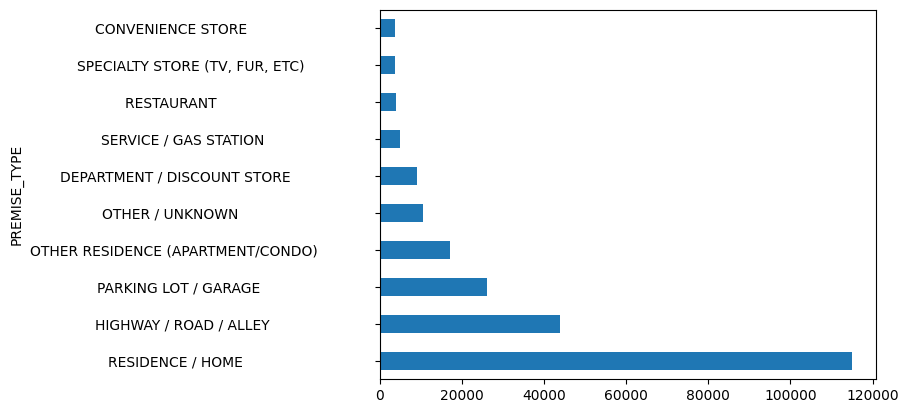

In [108]:
x.plot.barh()

In [128]:
cp= pd.crosstab(df['PREMISE_TYPE'],df['CRIME_TYPE'])
cp

CRIME_TYPE,ARSON,ASSAULT,BURGLARY,DISTURBING THE PEACE,DRUGS/ALCOHOL VIOLATIONS,DUI,FRAUD,HOMICIDE,MOTOR VEHICLE THEFT,OTHER,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,WEAPONS
PREMISE_TYPE,,,,,,,,,,,,,,,,
ABANDONED/CONDEMNED STRUCTURE,1,10,26,3,29,0,1,0,0,7,3,9,2,14,0,3
AIR / BUS / TRAIN TERMINAL,1,68,2,2,18,0,26,0,8,76,9,3,96,20,11,3
AMUSEMENT PARK,0,15,4,1,2,0,3,0,2,11,2,2,32,4,3,0
ATM SEPARATE FROM BANK,0,9,0,0,0,0,101,0,1,4,6,0,11,5,1,0
ATTACHED RESIDENTIAL GARAGE,1,3,228,1,0,0,0,0,5,7,1,0,7,10,12,0
AUTO DEALERSHIP (NEW OR USED),2,38,112,2,20,0,137,1,304,65,8,1,112,104,234,1
BANK / SAVINGS & LOAN,0,49,9,1,9,0,705,0,5,43,76,0,359,79,12,3
BAR / NIGHT CLUB,2,485,56,8,56,0,42,8,61,104,27,17,361,105,50,12
CAMP / CAMPGROUND,0,3,1,0,0,0,0,0,1,51,1,4,2,0,2,0


In [129]:
cp.max()

CRIME_TYPE
ARSON                         180
ASSAULT                     35428
BURGLARY                     8347
DISTURBING THE PEACE          671
DRUGS/ALCOHOL VIOLATIONS    14370
DUI                             5
FRAUD                        3794
HOMICIDE                      235
MOTOR VEHICLE THEFT          6663
OTHER                       21302
ROBBERY                      1228
SEX CRIMES                   1289
THEFT/LARCENY               14466
VANDALISM                    9903
VEHICLE BREAK-IN/THEFT       9881
WEAPONS                      2162
dtype: int64